In [ ]:
#Aava.csv dataset
import pandas as pd
from google.colab import files
import io

# Prompt for file upload
uploaded = files.upload()

# Retrieving the filename dynamically from the uploaded files dictionary
file_name = next(iter(uploaded))  # This grabs the first key in the dictionary which corresponds to the filename

# Load the dataset using the correct filename
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Print the first few rows of the DataFrame to verify successful loading
print(df.head())


Saving coin_Aave.csv to coin_Aave (4).csv
   SNo  Name Symbol                 Date       High        Low       Open  \
0    1  Aave   AAVE  2020-10-05 23:59:59  55.112358  49.787900  52.675035   
1    2  Aave   AAVE  2020-10-06 23:59:59  53.402270  40.734578  53.291969   
2    3  Aave   AAVE  2020-10-07 23:59:59  42.408314  35.970690  42.399947   
3    4  Aave   AAVE  2020-10-08 23:59:59  44.902511  36.696057  39.885262   
4    5  Aave   AAVE  2020-10-09 23:59:59  47.569533  43.291776  43.764463   

       Close        Volume     Marketcap  
0  53.219243  0.000000e+00  8.912813e+07  
1  42.401599  5.830915e+05  7.101144e+07  
2  40.083976  6.828342e+05  6.713004e+07  
3  43.764463  1.658817e+06  2.202651e+08  
4  46.817744  8.155377e+05  2.356322e+08  


In [ ]:
# Parse the 'Date' column and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Display column names
print(df.columns)



Index(['SNo', 'Name', 'Symbol', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap'],
      dtype='object')


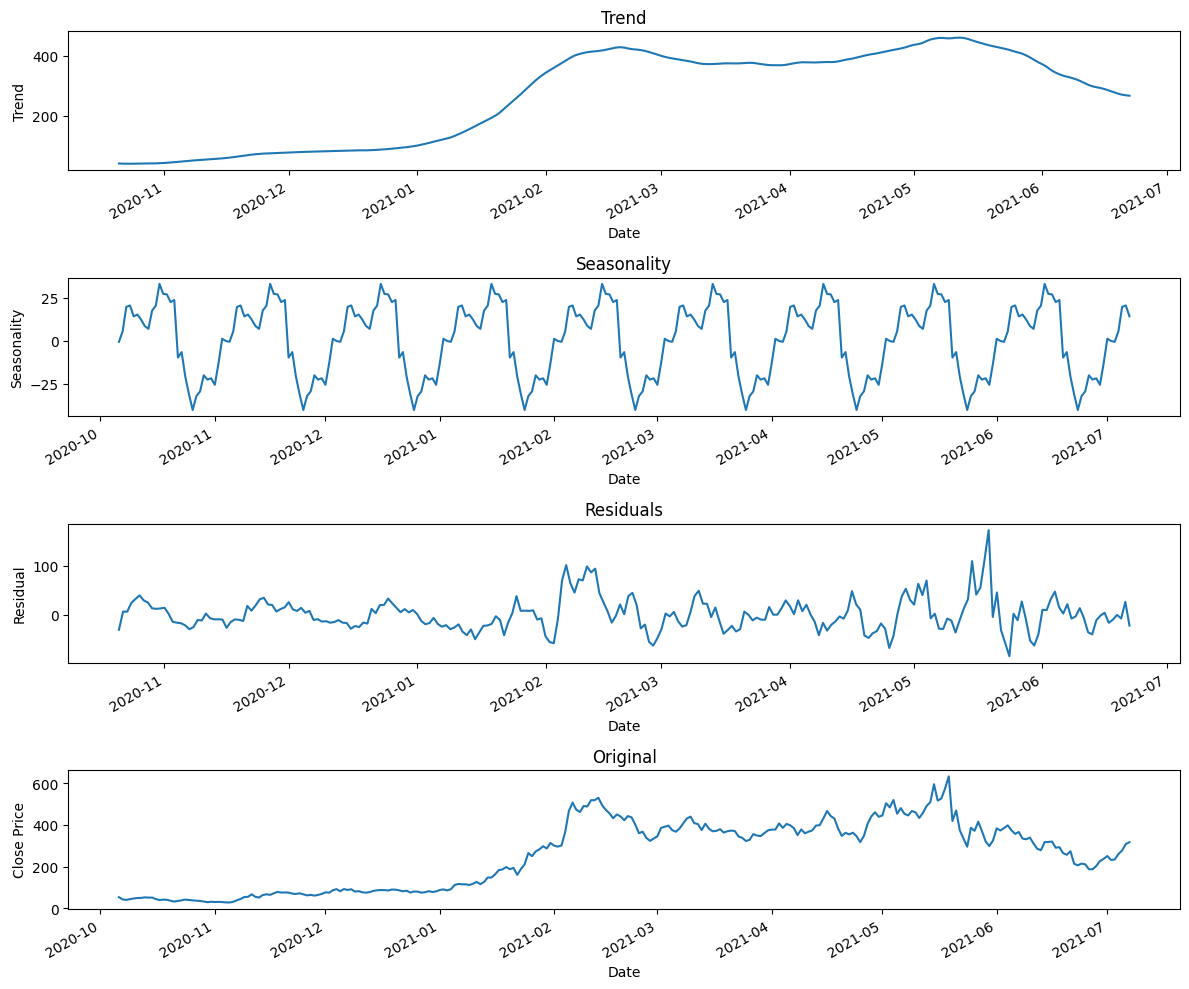

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Decompose the time series into seasonal, trend, and residual components
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=30)  # 'period' should match the expected seasonality; adjust as needed

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
ax1.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
ax2.set_ylabel('Seasonality')

decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
ax3.set_ylabel('Residual')

df['Close'].plot(ax=ax4)
ax4.set_title('Original')
ax4.set_ylabel('Close Price')

plt.tight_layout()
plt.show()


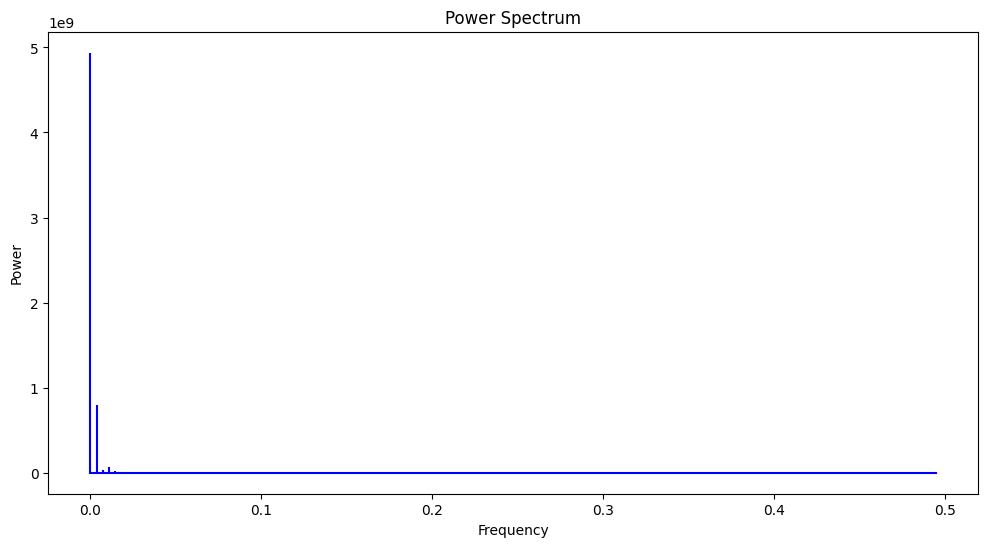

In [ ]:
import numpy as np

# Performing a Fourier Transform
fft_values = np.fft.fft(df['Close'])
frequencies = np.fft.fftfreq(len(fft_values), d=1)  # d is the sample spacing in terms of the number of samples per 'time unit'

# Getting the power spectrum
power = np.abs(fft_values) ** 2

# Plotting the power spectrum
plt.figure(figsize=(12, 6))
plt.stem(frequencies[:len(frequencies) // 2], power[:len(power) // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()


Ar model predection if we have a limitered amount of dat but we have to predect for long time it should be the average, here in this aara coin there is no drastic change either dicrease or increase thirts why our predection is also average for next year

MA Model predection:   In summary, when forecasting models predict a straight line at the long-term mean, they're using historical averages as the prediction, reflecting a conservative outlook when specific trends or cycles aren't apparent in the data. This is a common scenario in simpler models or when the data series is inherently noisy and devoid of clear, persistent directional trends.

In [ ]:
from google.colab import files
import io

uploaded = files.upload()


Saving coin_Aave.csv to coin_Aave (5).csv


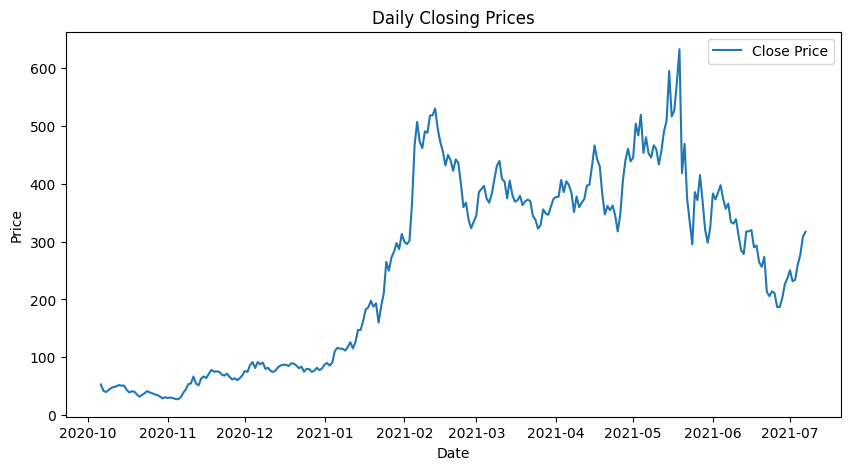

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['coin_Aave (5).csv']), index_col='Date', parse_dates=True)
df = df['Close']  # Ensure 'Close' is the correct column name

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df, label='Close Price')
plt.title('Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.4936697567453596
p-value: 0.5366404631462426


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(1, 0, 0))  # AR(1) model
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  275
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1295.111
Date:                Sun, 03 Nov 2024   AIC                           2596.221
Time:                        22:37:46   BIC                           2607.072
Sample:                    10-05-2020   HQIC                          2600.576
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.7545    114.668      2.021      0.043       7.010     456.499
ar.L1          0.9858      0.010     95.944      0.000       0.966       1.006
sigma2       711.9828     27.850     25.565      0.0

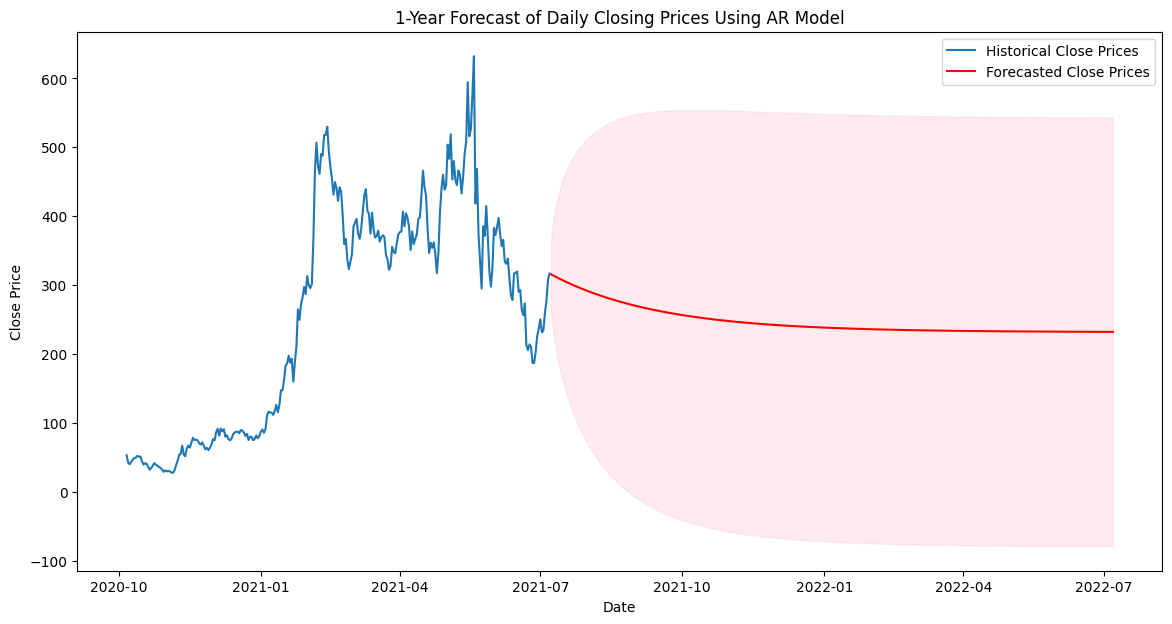

In [ ]:
forecast = model_fit.get_forecast(steps=365)  # Forecast the next year
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

future_dates = pd.date_range(start=df.index[-1], periods=366, freq='D')[1:]

plt.figure(figsize=(14, 7))
plt.plot(df.index, df, label='Historical Close Prices')
plt.plot(future_dates, mean_forecast, label='Forecasted Close Prices', color='red')
plt.fill_between(future_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('1-Year Forecast of Daily Closing Prices Using AR Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
